![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


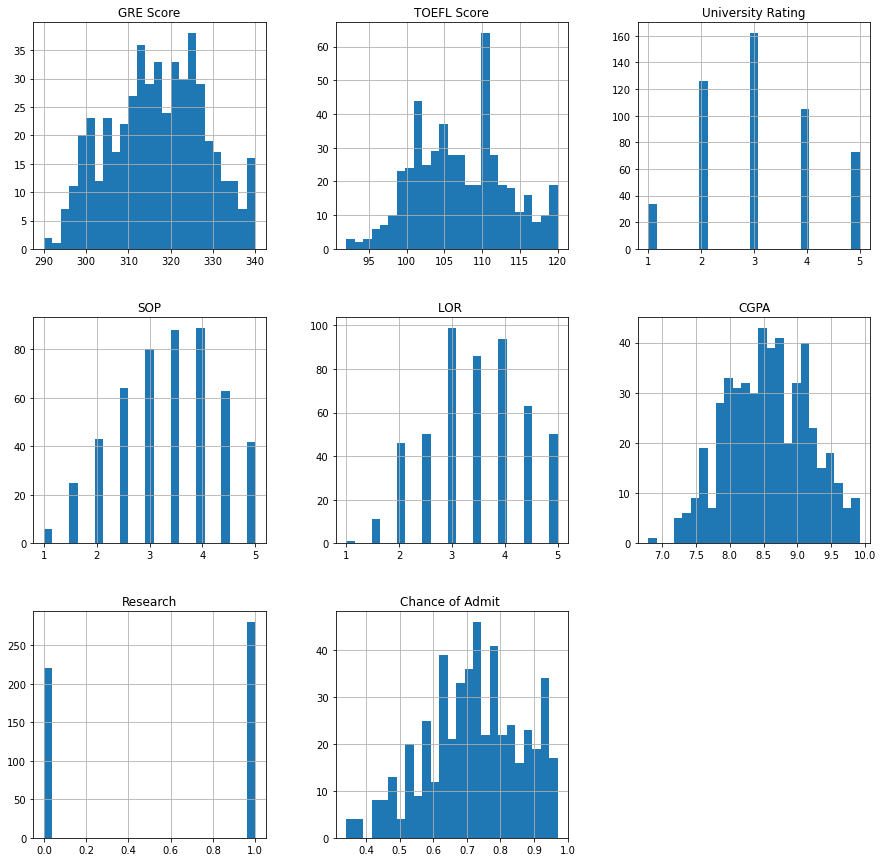

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
import seaborn as sns

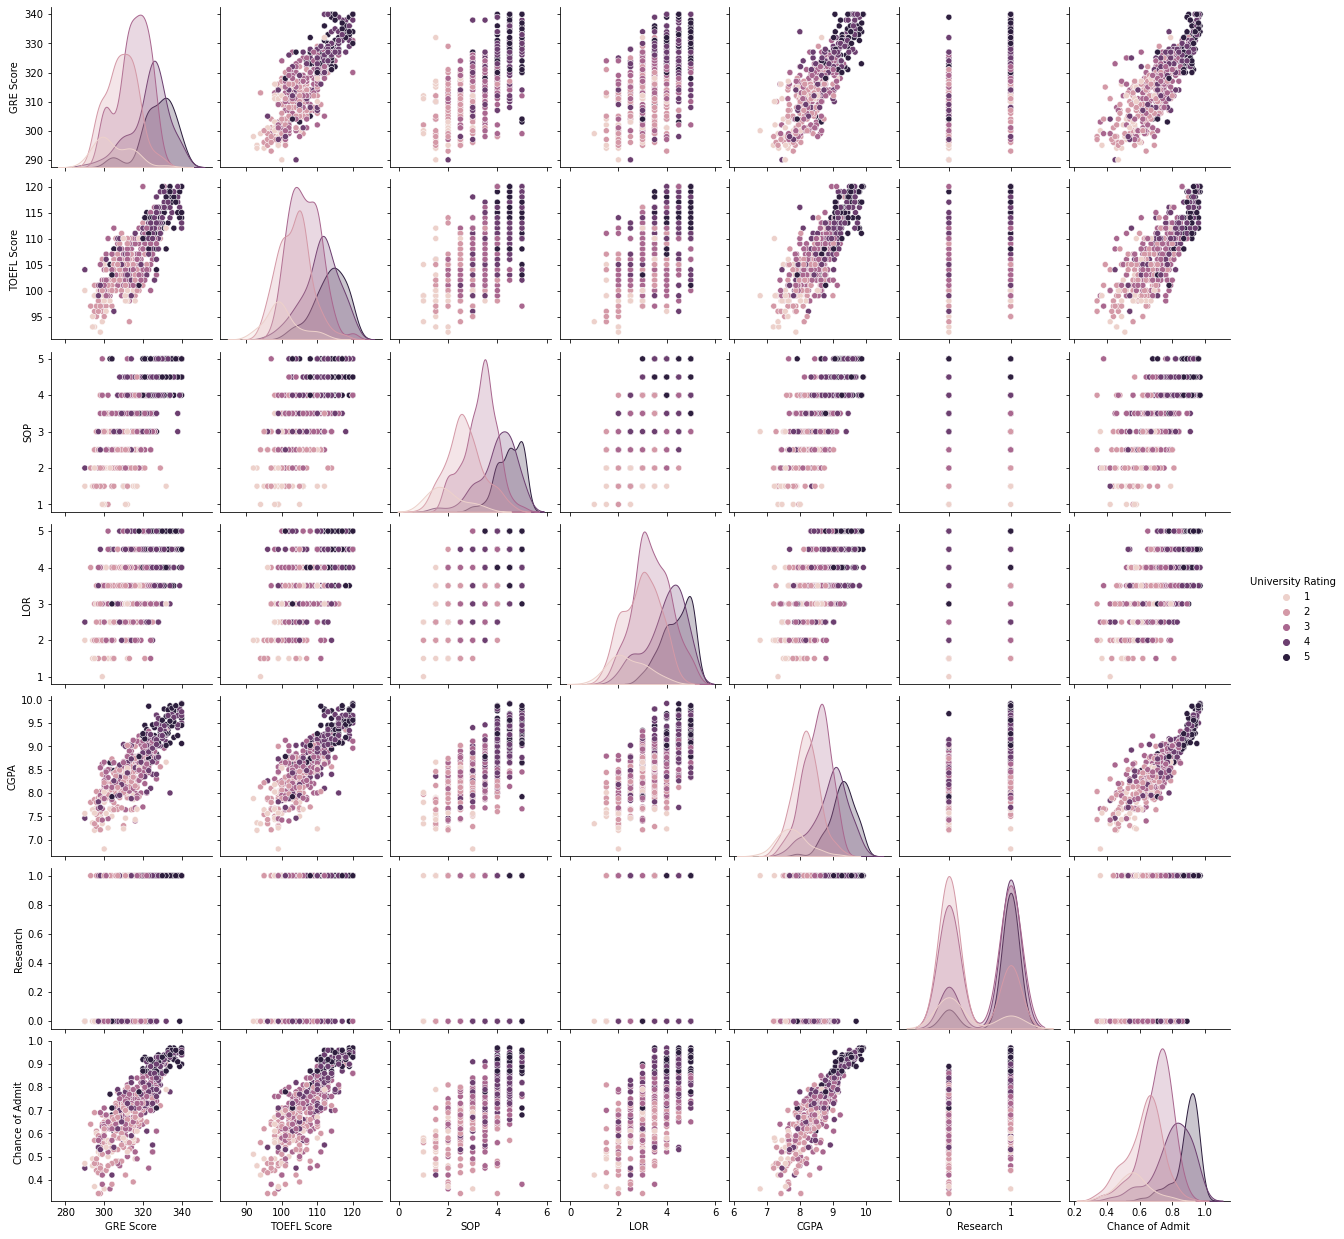

In [7]:
# cat_bin = ['University Rating' ]

# columnas = [x for x in data.columns if x not in cat_bin]
base_plot = data.reindex(columns = data.columns)
sns.set_palette("dark")
sns.pairplot(base_plot, hue = 'University Rating')

In [8]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[['Chance of Admit ']] #nos traemos Y como un dataframe, evitando tener que hacerle un reshape más adelante

In [9]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

#scaler.fit(X) se puede usar esto y abajo solo .transform (sin fit_ en Xtrain)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

# yTest = yTest.reshape(-1, 1) #esto se puede usar en caso de que y no haya ingresado originalmente como dataframe sino como una serie de pandas, por ejemplo.
# yTrain= yTrain.reshape(-1, 1)


In [11]:
# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [12]:
import keras.backend as K

# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


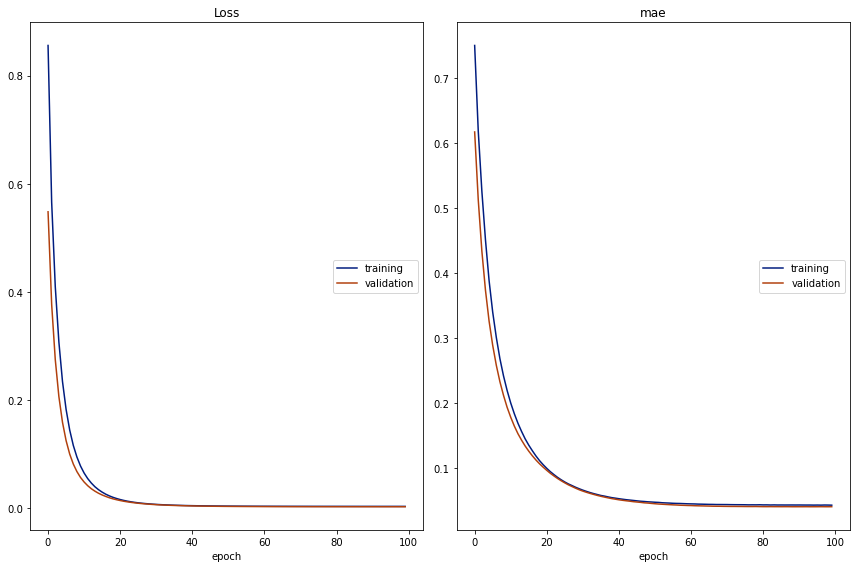

Loss
	training         	 (min:    0.004, max:    0.856, cur:    0.004)
	validation       	 (min:    0.003, max:    0.548, cur:    0.003)
mae
	training         	 (min:    0.043, max:    0.751, cur:    0.043)
	validation       	 (min:    0.041, max:    0.618, cur:    0.041)
11/11 [==============================] - 0s 19ms/step - loss: 0.0038 - mae: 0.0433 - val_loss: 0.0031 - val_mae: 0.0410


In [13]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])
#si en metrics usamos mse, nos da la misma gráfica de la función de pérdida (dado que en esa función estamos usando mse)
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [14]:
# Calculando MSE y MAE de validation 
loss1, mae1 = model.evaluate(xTest, yTest)

print('MSE: {:.4f}'.format(loss1))
print('MAE: {:.4f}'.format(mae1))

5/5 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0410
MSE: 0.0031
MAE: 0.0410


##### Conclusiones punto 1

Entrenamos una red neuronal de 1 capa. Para esto, usamos una función de perdida con el MSE, el optimizador fue Stochastic Gradient Descent (sgd) y el número de épocas finalmente lo mostramos con 100. 

Teniendo en cuenta que al problema al que nos enfrentamos es de regresión, decidimos utilizar el MSE como función de pérdida.

En el optimizador empleamos  'sgd' teniendo en cuenta las recomendaciones del laboratorio, donde manifiestan que para empezar con este tipo de optimizador se logran llegar a muy buenos resultados. 

Finalmente, en las épocas ensayamos varios valores. Inicialmente ensayamos con 50, pero en observamos que el modelo no lograba estabilizarse del todo. Por eso, seguimos ampliando el valor de las épocas hasta llegar a 100. A partir de la gráfica concluimos que al rededor de un valor de 60 se logra estabilizar la función de pérdida. 

Desde nuestro punto de vista, un buen número de épocas es con un valor de 80, teniendo en cuenta que tanto la función de pérdida como la métrica MAE tienen estabilidad a partir de ese valor. Adicional a esto, respaldamos esta opinión al realizar pruebas con 80 épocas y lograba los menores valores de MSE y MAE, comparado con otros resultados. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 2
#según el enunciado del ejercicio, entendemos que debemos realizar un modelo con dos capas ocultas:

K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var
model2.add(Dense(256, input_shape=(dims,), activation='relu')) #en esta linea se crean 2 capas: la de entrada y la 1a oculta
model2.add(Dense(256, activation='relu')) #segunda capa oculta
model2.add(Dense(output_var)) #capa de salida
model2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

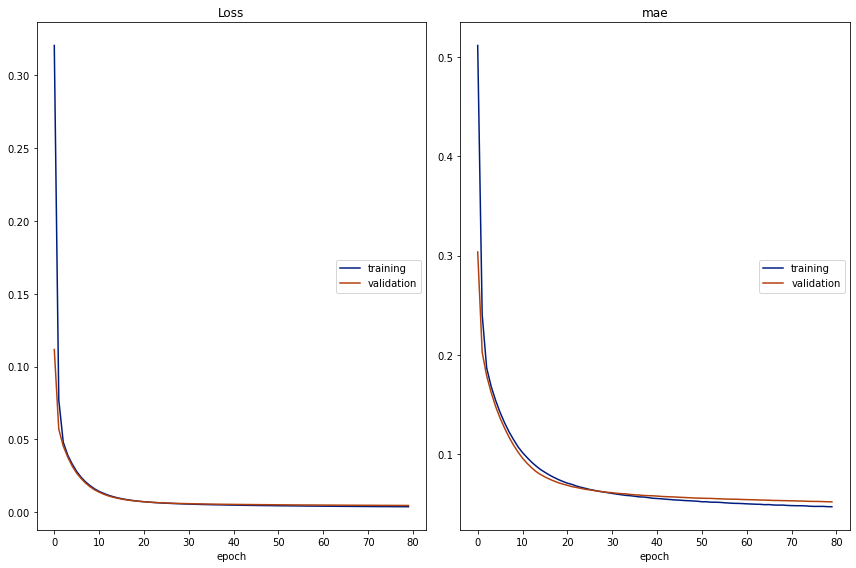

Loss
	training         	 (min:    0.004, max:    0.321, cur:    0.004)
	validation       	 (min:    0.005, max:    0.112, cur:    0.005)
mae
	training         	 (min:    0.047, max:    0.512, cur:    0.047)
	validation       	 (min:    0.052, max:    0.304, cur:    0.052)
11/11 [==============================] - 0s 20ms/step - loss: 0.0037 - mae: 0.0467 - val_loss: 0.0046 - val_mae: 0.0517


In [17]:
model2.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=80, 
          callbacks=[PlotLossesKeras()])

In [18]:
# Calculando MSE y MAE de validation 
loss2, mae2 = model2.evaluate(xTest, yTest)

print('MSE: {:.4f}'.format(loss2))
print('MAE: {:.4f}'.format(mae2))

5/5 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0517
MSE: 0.0046
MAE: 0.0517


##### Conclusiones punto 2

Entrenamos una red neuronal de 2 capas ocultas. Para este punto también usamos una función de perdida con el MSE, el optimizador fue Stochastic Gradient Descent (sgd) y en el número de épocas finalmente usamos 80. En la función de activación empleamos siempre 'relu'. 

El número de neuronas en las capas ocultas fue de 256, siguiendo el ejemplo del laboratorio. 

En cuanto al MSE y al MAE, encontramos valores un poco superiores a los alcanzados con la red de una sola capa, indicando que el modelo desmejoró. 

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [20]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(256, input_shape=(dims,), activation='relu'))
model3.add(Dropout(0.5))  # Dropout layer
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))  # Dropout layer 
model3.add(Dense(output_var))
model3.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model3.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae'])
# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 35,073
Trainable params: 35,073
Non-traina

In [21]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

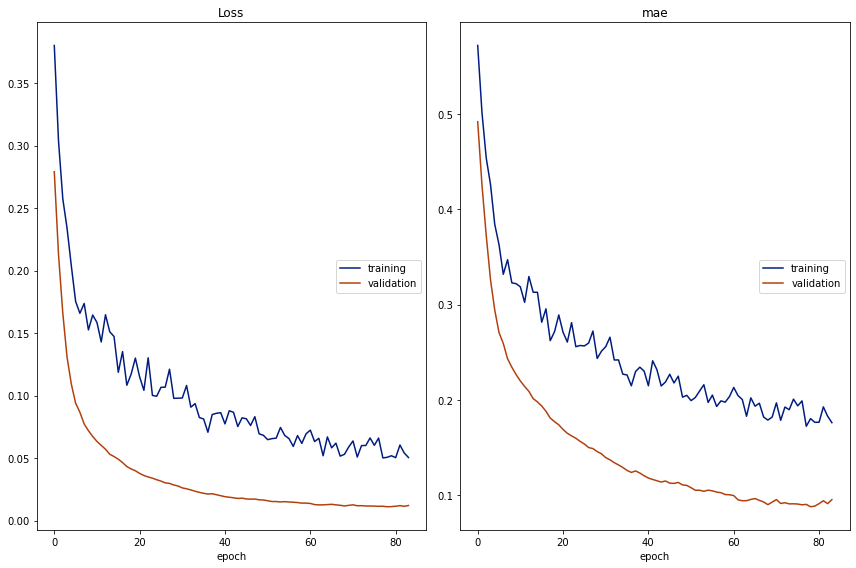

Loss
	training         	 (min:    0.050, max:    0.380, cur:    0.050)
	validation       	 (min:    0.011, max:    0.279, cur:    0.012)
mae
	training         	 (min:    0.172, max:    0.572, cur:    0.176)
	validation       	 (min:    0.088, max:    0.492, cur:    0.095)
3/3 [==============================] - 0s 91ms/step - loss: 0.0504 - mae: 0.1760 - val_loss: 0.0120 - val_mae: 0.0951
Epoch 84: early stopping


In [22]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model3.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=100, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras(), early_stop])

In [23]:
# Calculando MSE y MAE de validation 
loss3, mae3 = model3.evaluate(xTest, yTest)

print('MSE: {:.4f}'.format(loss3))
print('MAE: {:.4f}'.format(mae3))

5/5 [==============================] - 0s 1ms/step - loss: 0.0120 - mae: 0.0951
MSE: 0.0120
MAE: 0.0951


##### Conclusiones punto 3

Entrenamos una red neuronal de 2 capas ocultas. Para este punto también usamos una función de perdida con el MSE, el optimizador fue Stochastic Gradient Descent (sgd) y en el número de épocas finalmente usamos 100. En la función de activación empleamos siempre 'relu'. 

El número de neuronas en las capas ocultas fue de 256, siguiendo el ejemplo del laboratorio. Adicionalmente se usó la función de dropout para eliminar el 50% de neuronas de cada capa oculta. Adicionalmente se aplicó el earlystopping y se corrieron varias veces los comandos. 

Se encontró alta variabilidad en la época de parada, aún sin cambiar parámetros (a veces frenaba desde 30 épocas o incluso llegaba a más de 80). En cuanto al MSE y al MAE, encontramos valores superiores a los alcanzados con la red de una sola capa, indicando que el modelo desmejoró. 

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

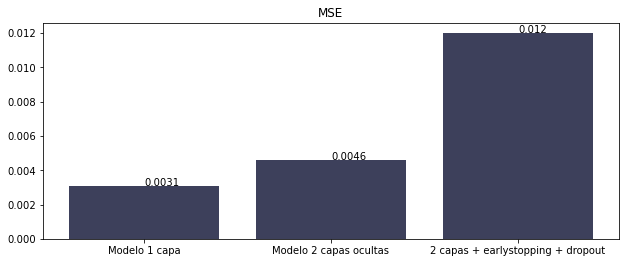

In [27]:
# Celda 4

fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['Modelo 1 capa', 'Modelo 2 capas ocultas', '2 capas + earlystopping + dropout']
ejeY = [round(loss1, 4), round(loss2, 4), round(loss3, 4)]
ax.bar(ejeX, ejeY, color = '#3d405b')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

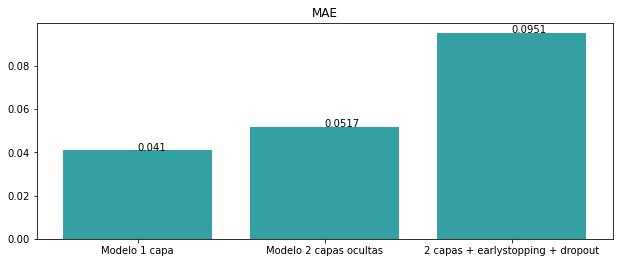

In [36]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("MAE")
ejeX = ['Modelo 1 capa', 'Modelo 2 capas ocultas', '2 capas + earlystopping + dropout']
ejeY = [round(mae1, 4), round(mae2, 4), round(mae3, 4)]
ax.bar(ejeX, ejeY, color = '#34a0a4')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

### Conclusiones

En este caso, el modelo con los mejores resultados en cuanto a MSE y MAE fue la red neuronal de una sola capa. A pesar de ensayar modelos más complejos que, en teoría podrían dar mejores resultados, fue el modelo más simple el que obtuvo el mejor desempeño. 

Lo anterior, puede deberse a que los datos pueden ser clasificados respecto a la variable desenlace de manera más o menos lineal, por lo cual los modelos más complejos no aportan a su solución. 

Se podrían ensayar otros parámetros (números de capas, épocas, neuronas, tipos de funciones de activación, etc) para buscar otros modelos con mejores resultados. 

La ventaja del mejor modelo, que fue el de una sola capa, es su sencillez y velocidad de ejecución. Por otro lado, el peor modelo, requiere más código y ajustes de parámetros, así como más tiempo de ejecución y consumo de recursos computacionales (sin lograr mejores resultados). 